In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

# Set default matplot figure size
#pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [2]:
#fix the previous shown error adding a r at the beginning
credit_df = pd.read_csv(r"C:\Users\i_seg\OneDrive\BIG DATA\DATA ANALISYS\MODULE5\Task2\default of credit card clients.csv", header =1)

In [3]:
# Check the first 5 rows of the data frame
credit_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [40]:
# Column names
credit_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [270]:
# Information about the data set
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 26 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null category
EDUCATION    30000 non-null category
MARRIAGE     30000 non-null category
AGE          30000 non-null int64
PAY_0        30000 non-null category
PAY_2        30000 non-null category
PAY_3        30000 non-null category
PAY_4        30000 non-null category
PAY_5        30000 non-null category
PAY_6        30000 non-null category
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
PayCredit    30000 non-null category
AgeRange   

In [3]:
credit_df['EDUCATION'].values[credit_df['EDUCATION'].astype(int) >= 4] = 4
credit_df['EDUCATION'].values[credit_df['EDUCATION'].astype(int) == 0] = 4

In [4]:
#Rename columns
credit_df.rename(columns={"default payment next month": "PayCredit"}, inplace = True)

In [8]:
#Create a new column for the age category
bins = [20, 35, 50, 65, np.inf]
names = ['20-35', '35-50', '50-65', '65+']

credit_df['AgeRange'] = pd.cut(credit_df['AGE'], bins, labels=names)

In [9]:
#replace values  with more representatives
credit_df["SEX"]=credit_df["SEX"].replace({1: "Male", 2: "Female"})

credit_df["EDUCATION"]=credit_df["EDUCATION"].replace({1: "school", 2: "university", 3:"high school", 4:"Other"})

credit_df["MARRIAGE"]=credit_df["MARRIAGE"].replace({1: "married", 2: "single", 3:"divorce", 4:"Other"})

credit_df["PAY_0"]=credit_df["PAY_0"].replace({-2: "No consumption", -1: "Paid in full", 0:"The use of revolving credit", 1:"1 payment delay", 2:"2 payment delay", 3:"3 payment delay"
                                               ,4:"4 payment delay", 5:"5 payment delay", 6:"6 payment delay", 7:"7 payment delay", 8:"8 payment delay", 9:">=9 payment delay"})
credit_df["PAY_6"]=credit_df["PAY_6"].replace({-2: "No consumption", -1: "Paid in full", 0:"The use of revolving credit", 1:"1 payment delay", 2:"2 payment delay", 3:"3 payment delay"
                                               ,4:"4 payment delay", 5:"5 payment delay", 6:"6 payment delay", 7:"7 payment delay", 8:"8 payment delay", 9:">=9 payment delay"})
credit_df["PAY_2"]=credit_df["PAY_2"].replace({-2: "No consumption", -1: "Paid in full", 0:"The use of revolving credit", 1:"1 payment delay", 2:"2 payment delay", 3:"3 payment delay"
                                               ,4:"4 payment delay", 5:"5 payment delay", 6:"6 payment delay", 7:"7 payment delay", 8:"8 payment delay", 9:">=9 payment delay"})
credit_df["PAY_3"]=credit_df["PAY_3"].replace({-2: "No consumption", -1: "Paid in full", 0:"The use of revolving credit", 1:"1 payment delay", 2:"2 payment delay", 3:"3 payment delay"
                                               ,4:"4 payment delay", 5:"5 payment delay", 6:"6 payment delay", 7:"7 payment delay", 8:"8 payment delay", 9:">=9 payment delay"})
credit_df["PAY_4"]=credit_df["PAY_4"].replace({-2: "No consumption", -1: "Paid in full", 0:"The use of revolving credit", 1:"1 payment delay", 2:"2 payment delay", 3:"3 payment delay"
                                               ,4:"4 payment delay", 5:"5 payment delay", 6:"6 payment delay", 7:"7 payment delay", 8:"8 payment delay", 9:">=9 payment delay"})
credit_df["PAY_5"]=credit_df["PAY_5"].replace({-2: "No consumption", -1: "Paid in full", 0:"The use of revolving credit", 1:"1 payment delay", 2:"2 payment delay", 3:"3 payment delay"
                                               ,4:"4 payment delay", 5:"5 payment delay", 6:"6 payment delay", 7:"7 payment delay", 8:"8 payment delay", 9:">=9 payment delay"})
credit_df["PayCredit"]=credit_df["PayCredit"].replace({1:"No", 0:"Yes"})

#parse columns to category
credit_df['SEX'] = credit_df.SEX.astype('category')
credit_df['EDUCATION'] = credit_df.EDUCATION.astype('category')
credit_df['MARRIAGE'] = credit_df.MARRIAGE.astype('category')
credit_df['AgeRange'] = credit_df.AgeRange.astype('category')
credit_df['PAY_0'] = credit_df.PAY_0.astype('category')
credit_df['PAY_6'] = credit_df.PAY_6.astype('category')
credit_df['PAY_2'] = credit_df.PAY_2.astype('category')
credit_df['PAY_3'] = credit_df.PAY_3.astype('category')
credit_df['PAY_4'] = credit_df.PAY_4.astype('category')
credit_df['PAY_5'] = credit_df.PAY_5.astype('category')
credit_df['PayCredit'] = credit_df.PayCredit.astype('category')


In [191]:
credit_df.groupby('EDUCATION')['EDUCATION'].count()

EDUCATION
Other            468
high school     4917
school         10585
university     14030
Name: EDUCATION, dtype: int64

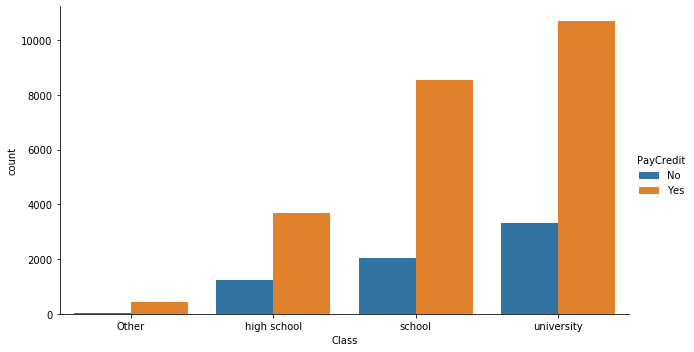

In [16]:
# Who paid credit group by Education level
g = sns.factorplot('EDUCATION', data=credit_df, hue='PayCredit', kind='count', aspect=1.75)
g.set_xlabels('Class')

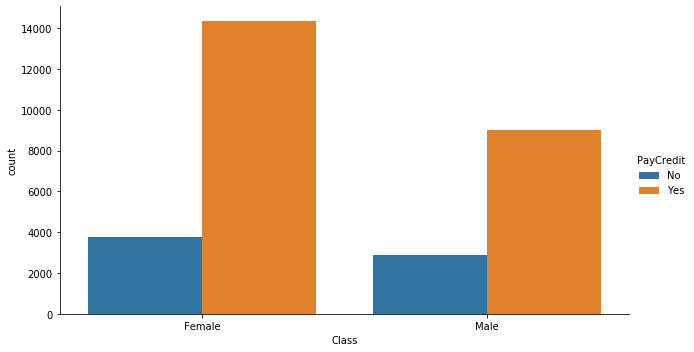

In [19]:
#Who paid credit by SEX
g = sns.factorplot('SEX', data=credit_df, hue='PayCredit', kind='count', aspect=1.75)
g.set_xlabels('Class')

C:\Users\i_seg\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


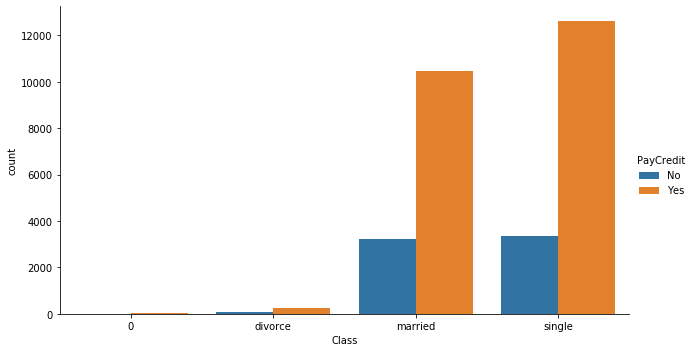

In [24]:
#Who paid credit by MARRIAGE
g = sns.factorplot('MARRIAGE', data=credit_df, hue='PayCredit', kind='count', aspect=1.75)
g.set_xlabels('Class')

In [64]:
# Number of clients married in each Education grouped by sex. Also LIMIT_BAL was found for each class grouped by sex.
credit_df.pivot_table('LIMIT_BAL', 'SEX', 'EDUCATION', aggfunc=np.sum, margins=True)


EDUCATION,Other,high school,school,university,All
SEX,,,,,
Female,55820000,381570000,1299520000,1343696000,3080606000
Male,29036000,240677680,954620000,719590000,1943923680
All,84856000,622247680,2254140000,2063286000,5024529680


In [69]:
#Education degree University
university = credit_df[credit_df['EDUCATION']=="university"]

In [70]:
# Total number of clients who are prepared students
len(university)

14030

In [225]:
#test
latePayment = credit_df[credit_df['PAY_0']==1]
fullPayment = credit_df[credit_df['PAY_0']==-1]
len(latePayment)
len(fullPayment)


5686

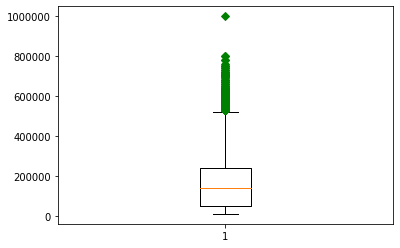

In [226]:
# total  credit  limit
A = credit_df['LIMIT_BAL']
plt.boxplot(A,0,'gD')
plt.show()

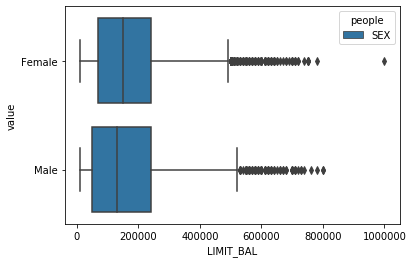

In [6]:
#credit Limit  by sex
dd=pd.melt(credit_df,id_vars=['LIMIT_BAL'],value_vars=['SEX'],var_name='people')
sns.boxplot(x='LIMIT_BAL',y='value',data=dd,hue='people')

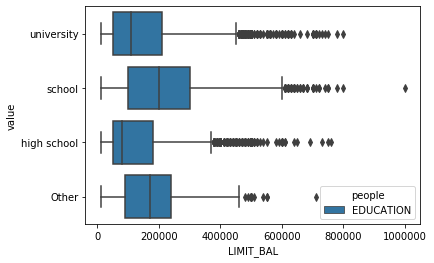

In [228]:
#credit limit by education
dd=pd.melt(credit_df,id_vars=['LIMIT_BAL'],value_vars=['EDUCATION'],var_name='people')
sns.boxplot(x='LIMIT_BAL',y='value',data=dd,hue='people')

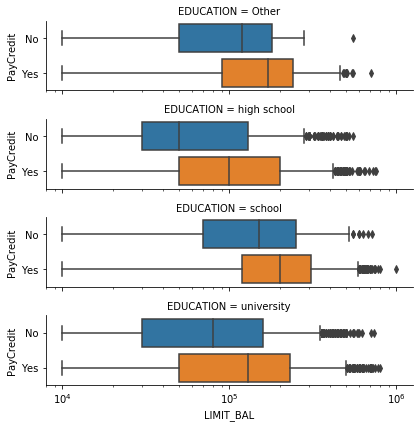

In [18]:
#credit limit group by Education and PayCredit
g = sns.catplot(x="LIMIT_BAL", y="PayCredit", row="EDUCATION",
                kind="box", orient="h", height=1.5, aspect=4,
                data=credit_df)
g.set(xscale="log");

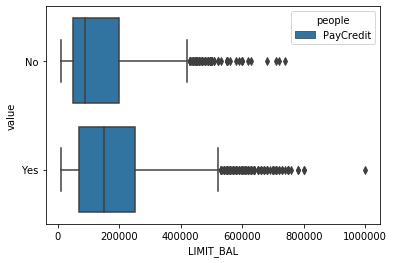

In [9]:
#credit limit group by theirs who paid the credit
dd=pd.melt(credit_df,id_vars=['LIMIT_BAL'],value_vars=['PayCredit'],var_name='people')
sns.boxplot(x='LIMIT_BAL',y='value',data=dd,hue='people')

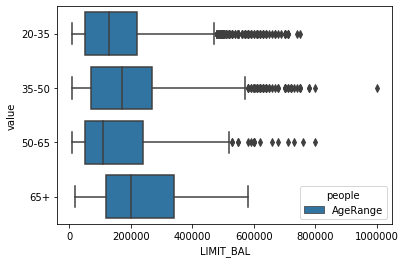

In [231]:
#credit limit by AgeRange
dd=pd.melt(credit_df,id_vars=['LIMIT_BAL'],value_vars=['AgeRange'],var_name='people')
sns.boxplot(x='LIMIT_BAL',y='value',data=dd,hue='people')

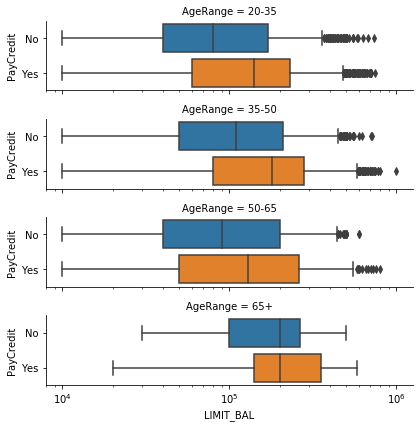

In [19]:
#credit limit group by AGE and PayCredit 
#It seems older people has a higher credit limit
g = sns.catplot(x="LIMIT_BAL", y="PayCredit", row="AgeRange",
                kind="box", orient="h", height=1.5, aspect=4,
                data=credit_df)
g.set(xscale="log");

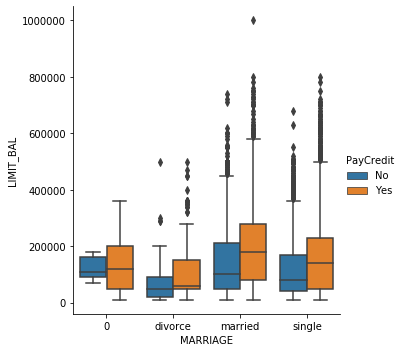

In [23]:
sns.catplot(x="MARRIAGE", y="LIMIT_BAL", hue="PayCredit", kind="box", data=credit_df);

In [72]:
# Number of clients who have education grouped by sex and marriage.
university.pivot_table('EDUCATION', 'SEX', 'MARRIAGE', aggfunc=len, margins=True)

MARRIAGE,0,divorce,married,single,All
SEX,,,,,
Female,5,99,4472,4080,8656
Male,1,63,2370,2940,5374
All,6,162,6842,7020,14030


In [79]:
table.columns, table.index

(Index(['Female', 'Male'], dtype='object', name='SEX'),
 MultiIndex([(      'Other', 'divorce'),
             (      'Other', 'married'),
             (      'Other',  'single'),
             ('high school',         0),
             ('high school', 'divorce'),
             ('high school', 'married'),
             ('high school',  'single'),
             (     'school',         0),
             (     'school', 'divorce'),
             (     'school', 'married'),
             (     'school',  'single'),
             ( 'university',         0),
             ( 'university', 'divorce'),
             ( 'university', 'married'),
             ( 'university',  'single')],
            names=['EDUCATION', 'MARRIAGE']))

In [85]:
credit_df.AGE.describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

Text(0.5, 1.0, "Distribution of clients' Ages")

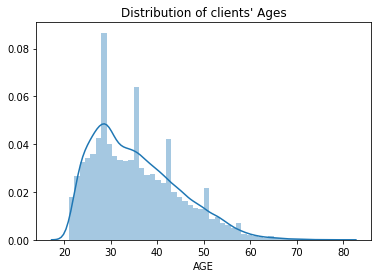

In [87]:
# Distribution of age, with an overlay of a density plot
age_dist = sns.distplot(age)
age_dist.set_title("Distribution of clients' Ages")

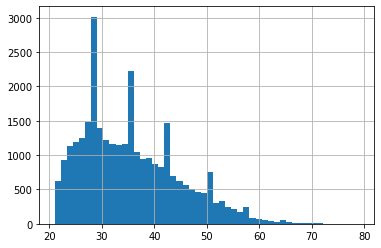

In [88]:
# Another way to plot a histogram of ages is shown below
credit_df['AGE'].hist(bins=50)

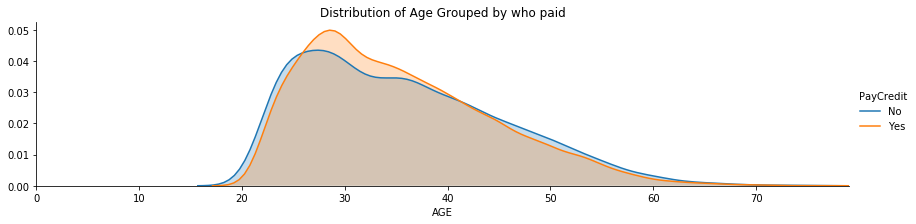

In [25]:
#Grouped by who paid

fig = sns.FacetGrid(credit_df, hue='PayCredit', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = credit_df['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by who paid')
fig.add_legend()

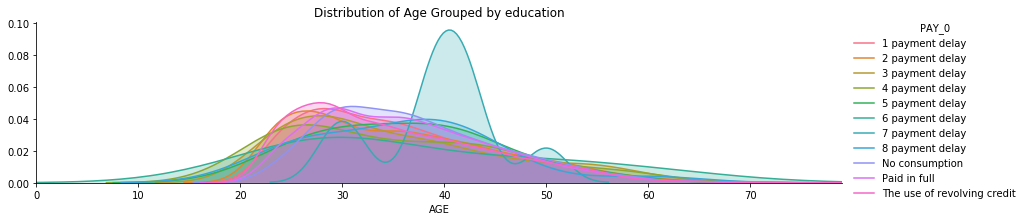

In [29]:
#Grouped by Class
fig = sns.FacetGrid(credit_df, hue='PAY_0', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = credit_df['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Payment Status')
fig.add_legend()